# Symulator kolejki M/M/C
## Projekt
Statystyka i teoria obsługi masowej.

Informatyka, stopień II, semestr I.

Grupa projektowa:
- Artur Bednarczyk

## Teoria
### Notacja Kendala
Notacja zaproponowana przez Davida G. Kednalla w 1953 roku dotyczy opisów systemów kolejkowych. Wygląda ona w następujący sposób:

**A/B/c/L/N**, gdzie kolejne składowe oznaczają:
- A - rozkład zmiennej losowej określającej czas między kolejnymi zgłoszeniami
- B - rozkład zmiennej losowej określającej czas obsługi zgłoszenia
- c - liczba równoległych stanowisk obsługujących zgłoszenia
- L - bufor, rozmiar kolejki (domyślnie - nieskończona)
- N - wymiar źródła zgłoszeń (domyślnie - nieskończone) 

### M/M/C
Zgodnie z notacją Kendalla system kolejkowy M/M/C to system z czasem miedzy kolejnymi zgłoszeniami o rozkładzie wykładniczym, czasem obsługi zgłoszeń o rozkłądzie wykładniczym oraz `c` równoległych statowiskach obsługi. Kolejka nie jest ograniczona.
## Symulator
### Technologia
Symulacja systemu M/M/c została przygotowana w języku `Python`.
### Opis
Celem symulatora jest wykonanie dużej liczby symulacji kolejki. W tym celu została przygotowana klasa tworząca testy o losowych parametrach z wyznaczonego przedziału a następnie wykonująca symulacje wykorzystując wszystkie dostępne rdzenie procesora urządzenia na którym zostaje uruchomiona. W wyniku działania otrzymujemy plik o rozszerzeniu `.csv`, który zawiera wyniki z wszystkich symulacji. Kolejne kolumny to:
- Total Customers - liczba wszystkich zgłoszeń w systemie
- Serviced Customers - liczba obsłużonych zgłoszeń
- Not Serviced Customers - liczba nieobsłużonych zgłoszeń
- Service Mean Time - średni czas obsługi
- Service Rate - ustawione tempo obsługi
- Arrival Rate - ustawione tempo napływu zgłoszeń
- Servers Number - liczba stanowisk obsługi - serwerów
- Time Limit - limit czasowy
- Delay probability - obliczone prawdopodobieństwo opóźńienia
- System load - obliczone obciążenie systemu
- Average Customers - obliczona średnia liczba zgłoszeń w systemie
- Mean Service Time - obliczony średni czas obsługi
- Average Time In System - obliczony średni czas przebywania zgłoszenia w systemie

Wymienione kolumny to wyniki z symulacji komputerowej, ustawienia danej symulacji oraz wyniki z teoretycznego modelu dla danych ustawień.
Po za wynikiem ogólny zostaje również zapisane kilka całych procesów z symulacji. Wyniki takie zawierają ustawienia użyte w danej symulacji oraz cały przebieg procesu.
Wartości teoretyczne są obliczane tylko gdy dany process posiada stan stacjonarny. 
### Przykład użycia


In [1]:
from time import time
from main import Tester
tester = Tester(3000)
tester.prepare_tests()
start_time = time()
tester.run_multi_process()
end_time = time()
tester.print_results(end_time - start_time)

  0%|          | 0/3000 [00:00<?, ?it/s]

Number of tests: 3000
CPU Process number: 4
Number of tests processed by each process:
[750, 750, 750, 750]
Progress bar might by little jumpy cause of multiprocessing


  0%|          | 0/3000 [03:20<?, ?it/s] 10.12it/s]


Tested in 200.8921115398407s
Results saved to file '../results/results.csv'


Ustawienia są losowane dla każdego testu, tempo napływu oraz obsługi z przedziału 1 - 10, a liczba serwerów 2 - 5. Natomiast czas określony dla danego testu jest wzorem: `10 * (i % 10 + 1)`, gdzie `i` oznacza i-ty test.

Dla powyższego testu wyniki wyglądają następująco:

In [11]:
import pandas as pd

dataset = pd.read_csv("../results/results.csv", delimiter=";")
print("Kolumny:")
for col in dataset.columns:
    print(col, end=" | ")
print("\n\n")
print(dataset)

Kolumny:
Total Customers | Serviced Customers | Not Serviced Customers | Service Mean Time | Service Rate | Arrival Rate | Servers Number | Time Limit | Delay probability | System load | Average Customers | Mean Service Time | Average Time In System | 


      Total Customers  Serviced Customers  Not Serviced Customers  \
0                  97                  96                       1   
1                  93                  93                       0   
2                 149                 148                       1   
3                 160                 159                       1   
4                 514                 508                       6   
...               ...                 ...                     ...   
2995              154                 152                       2   
2996              306                 305                       1   
2997              308                 304                       4   
2998              531                 531              

In [3]:
process = pd.read_csv("../results/process-0.csv", delimiter=";")
print(process)

       Time    Event  Server id  Customer id  Customers in system
0    0.0000  ARRIVAL        NaN            0                    1
1    0.0000  SERVICE        1.0            0                    1
2    0.0376  ARRIVAL        NaN            1                    2
3    0.0376  SERVICE        2.0            1                    2
4    0.0522    LEAVE        2.0            1                    1
..      ...      ...        ...          ...                  ...
285  9.6407  ARRIVAL        NaN           95                    1
286  9.6407  SERVICE        1.0           95                    1
287  9.7777  ARRIVAL        NaN           96                    2
288  9.7777  SERVICE        0.0           96                    2
289  9.9356    LEAVE        1.0           95                    1

[290 rows x 5 columns]


In [4]:
with open("../results/process-0.txt", "r") as file:
    print(file.read())

Run with settings:
Service rate: 5.823168452745631
Arrival rate: 9.316616392221361
Number of servers: 3
Time limit: 10
  Time  Event      Server id    Customer id    Customers in system
------  -------  -----------  -------------  ---------------------
0       ARRIVAL                           0                      1
0       SERVICE            1              0                      1
0.0376  ARRIVAL                           1                      2
0.0376  SERVICE            2              1                      2
0.0522  LEAVE              2              1                      1
0.0754  ARRIVAL                           2                      2
0.0754  SERVICE            2              2                      2
0.1004  ARRIVAL                           3                      3
0.1004  SERVICE            0              3                      3
0.1201  LEAVE              2              2                      2
0.188   ARRIVAL                           4                      3
0.188   SE

Przygotowany został również graficzny interpreter powyższych wyników. Plik `.csv` zawierający proces może zostać wykorzystany do wyświetlenia wykresu przedstawiającego cały proces oraz wykresu przedstawiającego liczbę zgłoszeń występującą w systemie oraz jak wiele razy taka liczba wystąpiła.

Run with settings:
Service rate: 5.823168452745631
Arrival rate: 9.316616392221361
Number of servers: 3
Time limit: 10



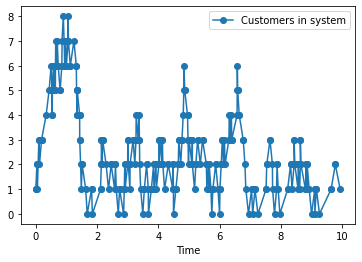

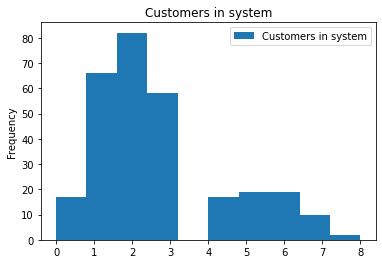

Run with settings:
Service rate: 4.364633495025329
Arrival rate: 2.365908738419975
Number of servers: 2
Time limit: 10



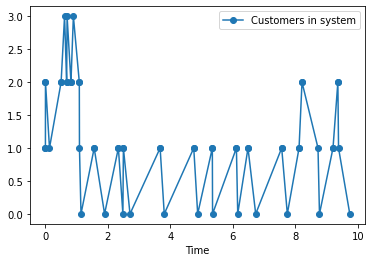

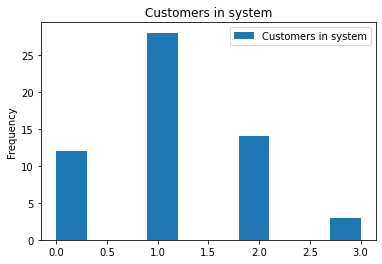

Run with settings:
Service rate: 7.033543309949404
Arrival rate: 3.1677861914367633
Number of servers: 4
Time limit: 10



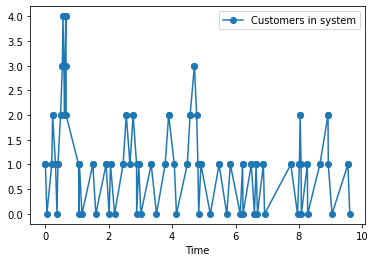

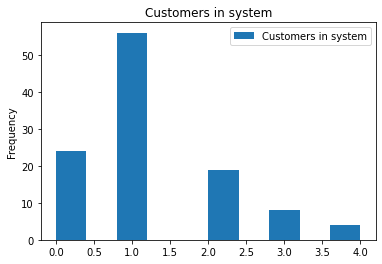

Run with settings:
Service rate: 6.252258476504805
Arrival rate: 7.543516437450767
Number of servers: 5
Time limit: 10



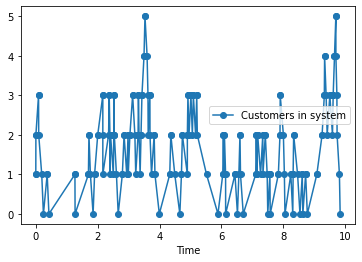

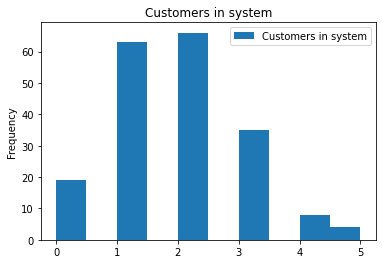

In [12]:
from resultAnalysis import Results
from matplotlib import pyplot as plt

Results().plot_process_from_file("../results/process-0")
plt.show()
Results().plot_process_from_file("../results/process-750")
plt.show()
Results().plot_process_from_file("../results/process-1500")
plt.show()
Results().plot_process_from_file("../results/process-2250")
plt.show()

## Wywołanie jednego testu

In [19]:
import time
from Simulator import MMC
from Utils import Utils


start = time.time()
model = MMC([1,3,3,30])
total, serviced, not_serviced, mean, process = model.run(4)
print(f"Całkowita liczba zgłoszeń: {total}")
print(f"Obsłużone: {serviced}")
print(f"Nie obsłużone: {not_serviced}")
print(f"Średni czas obsługi: {mean}")
end = time.time()
print(f"Czas symulacji: {round(end - start, 4)}")
print("Proces:")
Utils.print_table(process, ["CZAS", "ZDARZENIE", "SERWER", "ZGŁOSZENIE", "LICZBA ZGŁOSZEŃ W SYSTEMIE"])

Całkowita liczba zgłoszeń: 86
Obsłużone: 74
Nie obsłużone: 12
Średni czas obsługi: 1.0448438246944047
Czas symulacji: 0.28
Proces:
   CZAS  ZDARZENIE      SERWER    ZGŁOSZENIE    LICZBA ZGŁOSZEŃ W SYSTEMIE
-------  -----------  --------  ------------  ----------------------------
 0       ARRIVAL                           0                             1
 0       SERVICE             1             0                             1
 0.1843  ARRIVAL                           1                             2
 0.1843  SERVICE             2             1                             2
 0.3791  ARRIVAL                           2                             3
 0.3791  SERVICE             0             2                             3
 0.402   ARRIVAL                           3                             4
 0.627   ARRIVAL                           4                             5
 0.6637  ARRIVAL                           5                             6
 0.7074  LEAVE               1             0

## Analiza Statystyczna

In [20]:
print(f"Liczba wykonanych testów: {len(dataset)}")

Liczba wykonanych testów: 3000


### Przygotwanie danych
Sprawdzenie czy są braki w wartościach (brak stanu stacjonarnego). W przypadku wystąpienia braku, zostaną usunięte puste wiersze.

In [43]:
dataset['load'] = dataset['System load'].apply(lambda q: 'low' if q <= 0.4 else 'medium' if q <= 0.7 else 'high')

def show_nulls(dataset):
    Sum = dataset.isnull().sum()
    Percentage = (dataset.isnull().sum() / dataset.isnull().count())
    stat = pd.concat([Sum, Percentage], axis=1, keys=['Sum', 'Percentage'])
    print(stat)
    
show_nulls(dataset)

                        Sum  Percentage
Total Customers           0    0.000000
Serviced Customers        0    0.000000
Not Serviced Customers    0    0.000000
Service Mean Time         0    0.000000
Service Rate              0    0.000000
Arrival Rate              0    0.000000
Servers Number            0    0.000000
Time Limit                0    0.000000
Delay probability       266    0.088667
System load               0    0.000000
Average Customers       266    0.088667
Mean Service Time         0    0.000000
Average Time In System  266    0.088667
quality_label             0    0.000000
load                      0    0.000000


In [44]:
db_prepared = dataset.dropna()
    
show_nulls(db_prepared)

                        Sum  Percentage
Total Customers           0         0.0
Serviced Customers        0         0.0
Not Serviced Customers    0         0.0
Service Mean Time         0         0.0
Service Rate              0         0.0
Arrival Rate              0         0.0
Servers Number            0         0.0
Time Limit                0         0.0
Delay probability         0         0.0
System load               0         0.0
Average Customers         0         0.0
Mean Service Time         0         0.0
Average Time In System    0         0.0
quality_label             0         0.0
load                      0         0.0


### Statystyki

In [45]:
db_prepared.mean()

Total Customers           285.678127
Serviced Customers        283.778347
Not Serviced Customers      1.899781
Service Mean Time           0.215321
Service Rate                5.903336
Arrival Rate                5.208609
Servers Number              3.531822
Time Limit                 54.857352
Delay probability           0.088469
System load                 0.324183
Average Customers           0.803375
Mean Service Time           0.217350
Average Time In System      0.118955
dtype: float64

In [46]:
db_prepared.describe()

,Total Customers,Serviced Customers,Not Serviced Customers,Service Mean Time,Service Rate,Arrival Rate,Servers Number,Time Limit,Delay probability,System load,Average Customers,Mean Service Time,Average Time In System
count,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2.734000e+03,2734.000000,2.734000e+03,2734.000000,2.734000e+03
mean,285.678127,283.778347,1.899781,0.215321,5.903336,5.208609,3.531822,54.857352,8.846950e-02,0.324183,8.033745e-01,0.217350,1.189546e-01
std,219.106071,218.362986,4.775783,0.140242,2.400288,2.582453,1.103620,28.782429,1.138878e-01,0.223572,1.278417e+01,0.139849,1.586643e+00
min,6.000000,5.000000,0.000000,0.071600,1.003386,1.001928,2.000000,10.000000,1.500835e-07,0.022912,3.519409e-09,0.100010,3.180647e-09
25%,109.000000,108.000000,0.000000,0.125650,3.936812,2.947723,3.000000,30.000000,4.607806e-03,0.152430,8.818808e-04,0.125742,2.277206e-04
50%,224.000000,222.500000,1.000000,0.166350,5.950297,5.116669,4.000000,50.000000,3.597547e-02,0.265405,1.235043e-02,0.168059,2.702556e-03
75%,416.000000,415.000000,2.000000,0.248600,7.952818,7.369511,5.000000,80.000000,1.379746e-01,0.438698,1.056089e-01,0.254013,1.958430e-02
max,1029.000000,1027.000000,91.000000,1.160200,9.999002,9.996929,5.000000,100.000000,4.986346e-01,0.999450,6.054404e+02,0.996626,6.696252e+01


In [49]:
db_prepared.load

0       medium
1          low
2          low
3       medium
4         high
         ...  
2995       low
2996       low
2997    medium
2998       low
2999       low
Name: load, Length: 2734, dtype: object

<BarContainer object of 4 artists>

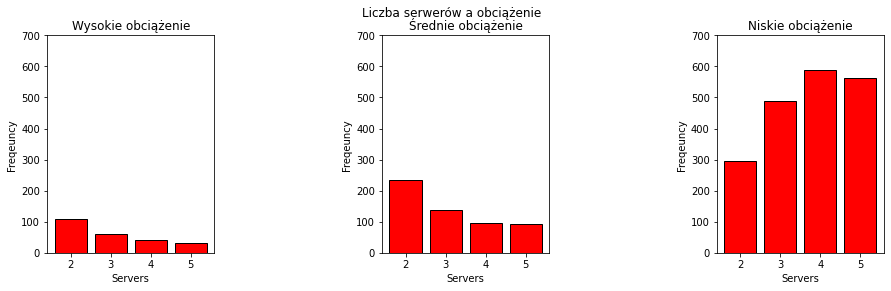

In [75]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle("Liczba serwerów a obciążenie")
fig.subplots_adjust(wspace=1)

ax[0].set_title("Wysokie obciążenie")
ax[0].set_xlabel("Servers")
ax[0].set_ylabel("Freqeuncy")
x = db_prepared['Servers Number'][db_prepared.load == 'high'].value_counts()
x = (list(x.index), list(x.values))
ax[0].set_ylim([0, 700])
ax[0].bar(x[0], x[1], color='red', edgecolor='black')

ax[1].set_title("Średnie obciążenie")
ax[1].set_xlabel("Servers")
ax[1].set_ylabel("Freqeuncy")
x = db_prepared['Servers Number'][db_prepared.load == 'medium'].value_counts()
x = (list(x.index), list(x.values))
ax[1].set_ylim([0, 700])
ax[1].bar(x[0], x[1], color='red', edgecolor='black')

ax[2].set_title("Niskie obciążenie")
ax[2].set_xlabel("Servers")
ax[2].set_ylabel("Freqeuncy")
x = db_prepared['Servers Number'][db_prepared.load == 'low'].value_counts()
x = (list(x.index), list(x.values))
ax[2].set_ylim([0, 700])
ax[2].bar(x[0], x[1], color='red', edgecolor='black')

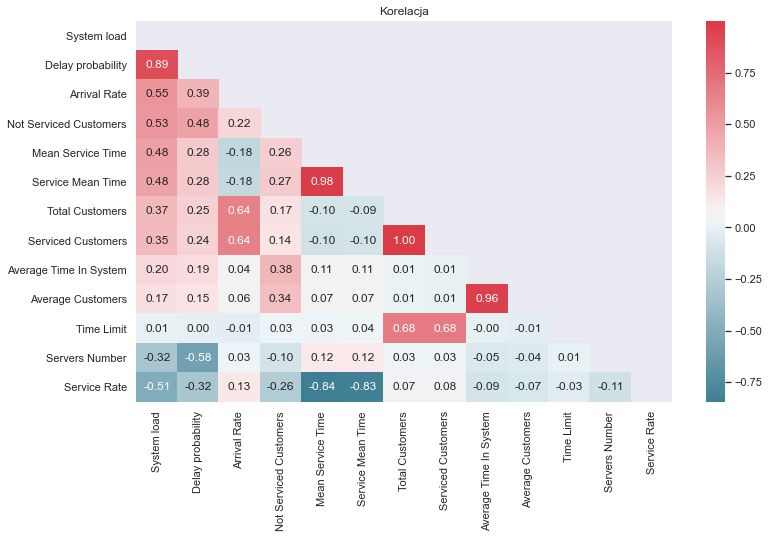

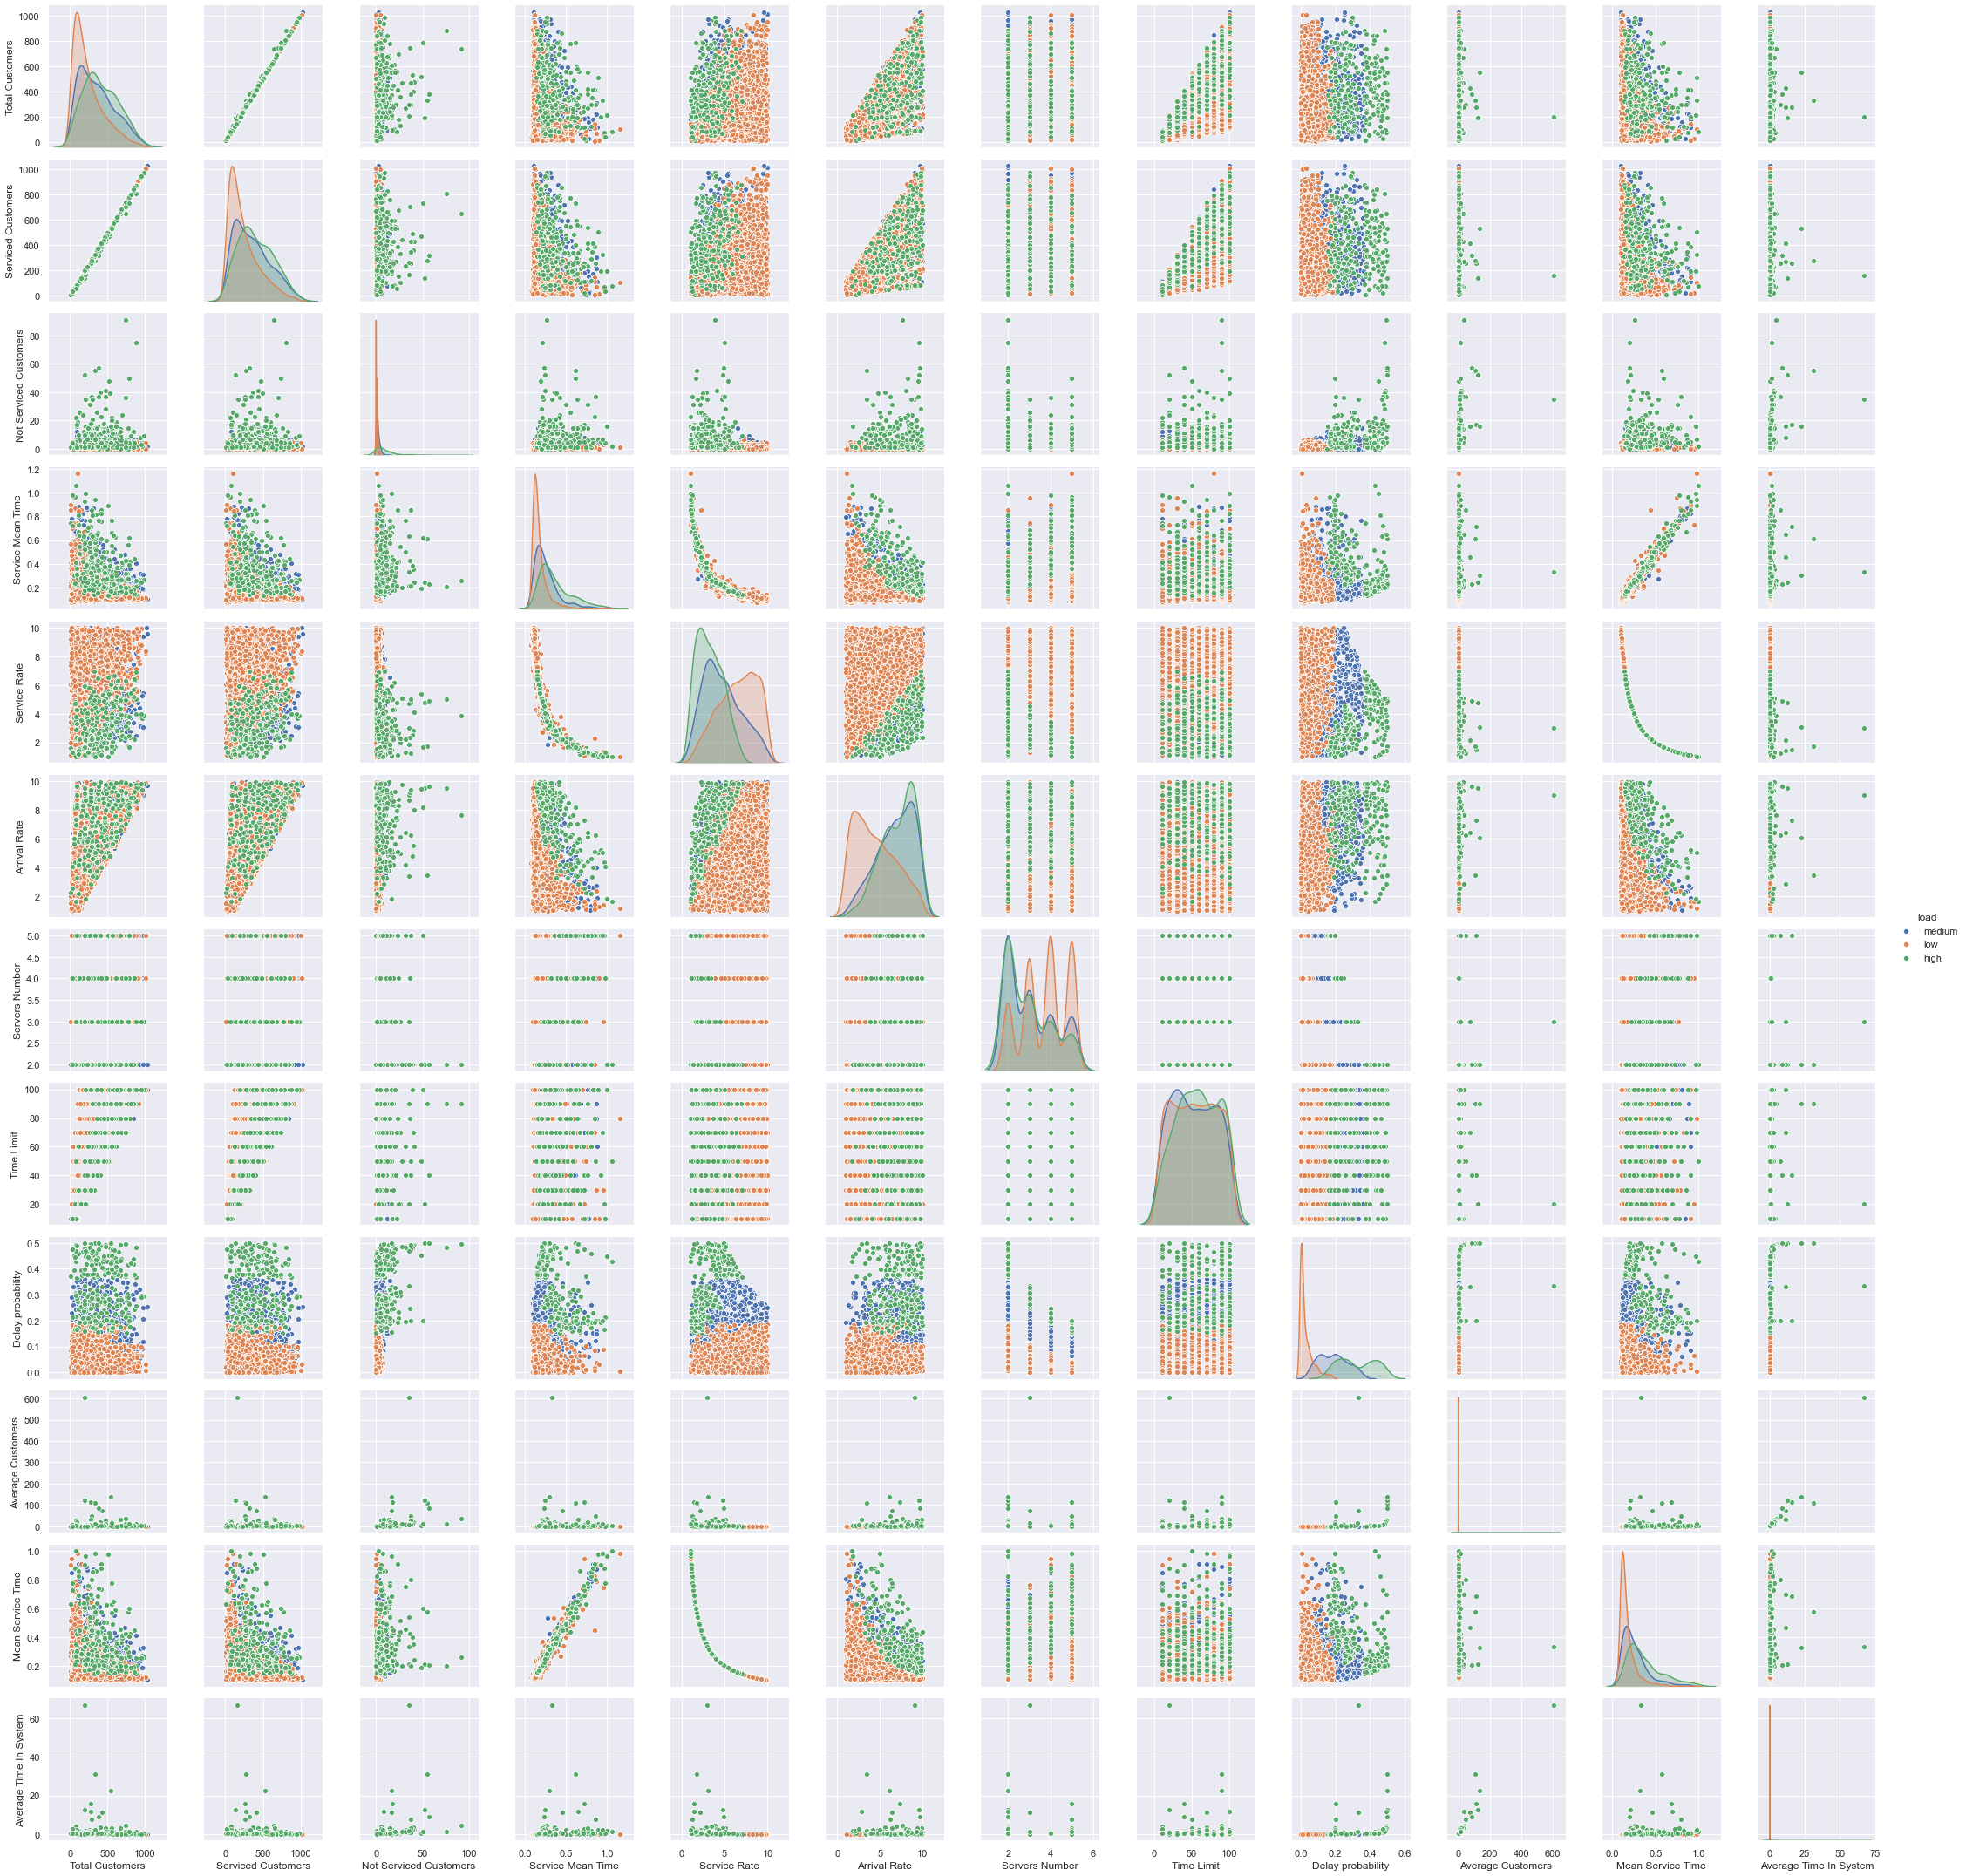

In [80]:
import numpy as np
import seaborn as sns

corr = db_prepared.corr()
top_corr_cols = corr['System load'].sort_values(ascending=False).keys()
top_corr = corr.loc[top_corr_cols, top_corr_cols]
drop_self = np.zeros_like(top_corr)
drop_self[np.triu_indices_from(drop_self)] = True
plt.figure(figsize=(12, 7))
plt.title("Korelacja")
sns.heatmap(top_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f",
            mask=drop_self)
sns.set(font_scale=1.5)

sns.set(font_scale=1.0)
cols = db_prepared.columns
cols = cols.drop('System load')
g = sns.pairplot(data=db_prepared.loc[:, cols], hue='load')
fig = g.fig
fig.subplots_adjust(top=0.99, wspace=0.3)
plt.show()

